# ARBOLES DE DECISION - CALIDAD DEL VINO

In [2]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
# conocemos la dimension del conjunto de datos.
data.shape

(1599, 12)

In [11]:
# vemos un preliminar de las estadisticas del conjunto de datos.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# identificamos si el conjunto de datos tienen campos vacios o nulos. 
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

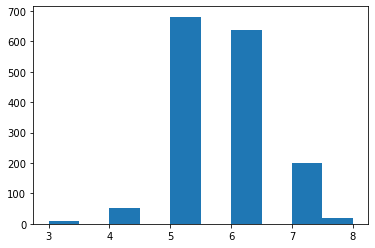

In [13]:
plt.hist(data.quality)

<AxesSubplot:xlabel='density', ylabel='alcohol'>

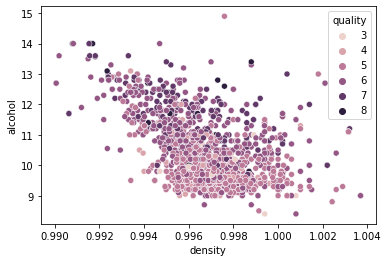

In [14]:
sns.scatterplot(x = "density", y = "alcohol", hue = "quality", data = data)


<AxesSubplot:xlabel='sulphates', ylabel='pH'>

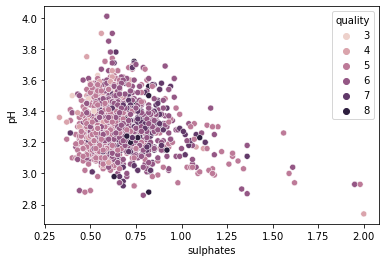

In [17]:
sns.scatterplot(x = "sulphates", y = "pH", hue = "quality", data = data)

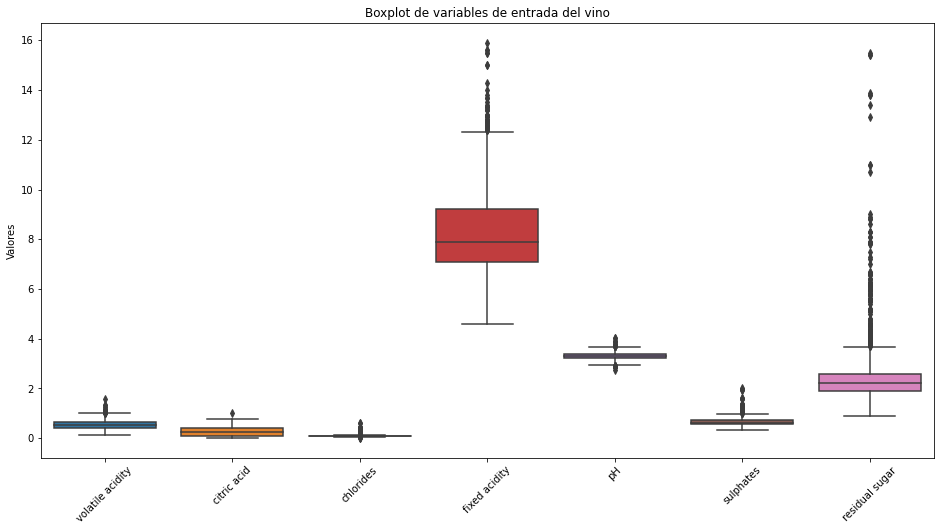

In [132]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=data[['volatile acidity', 'citric acid', 'chlorides','fixed acidity','pH','sulphates','residual sugar']])
plt.xticks(rotation=45)
plt.title('Boxplot de variables de entrada del vino')
plt.ylabel('Valores')
plt.show()

In [116]:
predictors_col = ['volatile acidity', 'citric acid', 'chlorides','fixed acidity','pH','sulphates','residual sugar']
target_col = ['quality']

In [117]:

predictors = data[predictors_col]
target = data[target_col]

In [118]:
predictors

,volatile acidity,citric acid,chlorides,fixed acidity,pH,sulphates,residual sugar
0,0.700,0.00,0.076,7.4,3.51,0.56,1.9
1,0.880,0.00,0.098,7.8,3.20,0.68,2.6
2,0.760,0.04,0.092,7.8,3.26,0.65,2.3
3,0.280,0.56,0.075,11.2,3.16,0.58,1.9
4,0.700,0.00,0.076,7.4,3.51,0.56,1.9
...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,6.2,3.45,0.58,2.0
1595,0.550,0.10,0.062,5.9,3.52,0.76,2.2
1596,0.510,0.13,0.076,6.3,3.42,0.75,2.3
1597,0.645,0.12,0.075,5.9,3.57,0.71,2.0


In [119]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [120]:
corr = predictors.corr()
corr

,volatile acidity,citric acid,chlorides,fixed acidity,pH,sulphates,residual sugar
volatile acidity,1.000000,-0.552496,0.061298,-0.256131,0.234937,-0.260987,0.001918
citric acid,-0.552496,1.000000,0.203823,0.671703,-0.541904,0.312770,0.143577
chlorides,0.061298,0.203823,1.000000,0.093705,-0.265026,0.371260,0.055610
fixed acidity,-0.256131,0.671703,0.093705,1.000000,-0.682978,0.183006,0.114777
pH,0.234937,-0.541904,-0.265026,-0.682978,1.000000,-0.196648,-0.085652
sulphates,-0.260987,0.312770,0.371260,0.183006,-0.196648,1.000000,0.005527
residual sugar,0.001918,0.143577,0.055610,0.114777,-0.085652,0.005527,1.000000


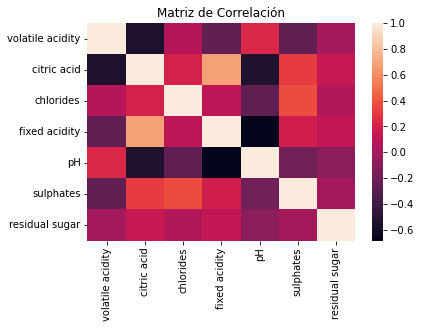

In [121]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

[Text(0.4938035935289958, 0.9761904761904762, 'X[5] <= 0.645\ngini = 0.645\nsamples = 1279\nvalue = [9, 47, 529, 523, 159, 12]'),
 Text(0.14801206683168316, 0.9285714285714286, 'X[0] <= 0.365\ngini = 0.589\nsamples = 745\nvalue = [8, 42, 390, 270, 35, 0]'),
 Text(0.02652050919377652, 0.8809523809523809, 'X[2] <= 0.057\ngini = 0.625\nsamples = 83\nvalue = [0, 2, 21, 43, 17, 0]'),
 Text(0.008486562942008486, 0.8333333333333334, 'X[6] <= 1.45\ngini = 0.653\nsamples = 12\nvalue = [0, 1, 2, 3, 6, 0]'),
 Text(0.005657708628005658, 0.7857142857142857, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0, 0]'),
 Text(0.011315417256011316, 0.7857142857142857, 'X[6] <= 2.25\ngini = 0.494\nsamples = 9\nvalue = [0, 1, 2, 0, 6, 0]'),
 Text(0.008486562942008486, 0.7380952380952381, 'X[4] <= 3.275\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 2, 0, 1, 0]'),
 Text(0.005657708628005658, 0.6904761904761905, 'X[0] <= 0.235\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 0, 1, 0]'),
 Text(0.002828854314002829, 0.642

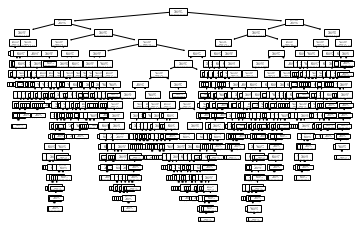

In [122]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state=5)
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)
plot_tree(arbol)

In [123]:
predicciones = arbol.predict(X_test)


In [124]:
predicciones

array([6, 3, 5, 7, 5, 5, 5, 5, 7, 5, 6, 5, 5, 5, 7, 6, 6, 7, 4, 8, 5, 5,
       6, 6, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 7, 7, 5, 5, 7, 5, 6, 5,
       7, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 7, 7, 6, 6, 7, 6, 5, 6,
       6, 7, 7, 6, 6, 7, 6, 6, 6, 4, 5, 5, 5, 6, 5, 5, 5, 5, 5, 3, 6, 5,
       6, 5, 6, 6, 6, 5, 4, 5, 6, 7, 6, 7, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       7, 6, 5, 5, 6, 6, 3, 5, 5, 7, 4, 5, 5, 5, 5, 6, 5, 5, 7, 7, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 5, 4, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 6, 7, 5, 6, 6, 6, 5, 7, 6, 4, 5, 5, 5, 6, 6, 7, 6, 5, 6, 5,
       7, 6, 5, 6, 4, 6, 5, 5, 6, 6, 6, 6, 7, 4, 7, 5, 7, 6, 5, 6, 6, 6,
       5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 8, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 7, 5, 7, 7, 6, 5, 6, 6, 7, 5, 7, 6, 5, 5,
       5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 7, 6, 4, 6, 6, 6,
       5, 5, 4, 5, 5, 6, 5, 5, 5, 6, 6, 7, 7, 6, 7, 6, 4, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6,

In [125]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,1,0,1,2,2,0
5,1,5,96,40,9,1
6,1,6,22,71,15,0
7,0,1,7,17,15,0
8,0,0,0,3,2,1


In [126]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.571875

In [127]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6052995250078511

In [128]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.571875

In [129]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5828705559648666